In [1]:
# Romain Puech, 2024

import numpy as np
import time
from displays import display_grid, save_grid_image, create_video_from_images, create_scenario_video
from simulations import propagate_wildfire, propagate_smoke, propagate_smoke_parallel, propagate_smoke_parallel2, run_simulation, generate_scenario, load_ignition_map, plot_ignition_map,generate_ignition_map, save_ignition_map, load_scenario,save_scenario
from Drone import Drone
from RoutingStrategy import RoutingStrategy, LoggedGroundPlacementStrategy, GroundPlacementStrategy, reset_count
from benchmark import run_benchmark_scenario, run_benchmark_scenarii, run_benchmark_scenarii_sequential


from concurrent.futures import ThreadPoolExecutor
from matplotlib import pyplot as plt

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


   Resolving package versions...
  No Changes to `/opt/anaconda3/julia_env/Project.toml`
  No Changes to `/opt/anaconda3/julia_env/Manifest.toml`
   Resolving package versions...
  No Changes to `/opt/anaconda3/julia_env/Project.toml`
  No Changes to `/opt/anaconda3/julia_env/Manifest.toml`
   Resolving package versions...
  No Changes to `/opt/anaconda3/julia_env/Project.toml`
  No Changes to `/opt/anaconda3/julia_env/Manifest.toml`
   Resolving package versions...
  No Changes to `/opt/anaconda3/julia_env/Project.toml`
  No Changes to `/opt/anaconda3/julia_env/Manifest.toml`
   Resolving package versions...
  No Changes to `/opt/anaconda3/julia_env/Project.toml`
  No Changes to `/opt/anaconda3/julia_env/Manifest.toml`
   Resolving package versions...
  No Changes to `/opt/anaconda3/julia_env/Project.toml`
  No Changes to `/opt/anaconda3/julia_env/Manifest.toml`
   Resolving package versions...
  No Changes to `/opt/anaconda3/julia_env/Project.toml`
  No Changes to `/opt/anaconda3/jul

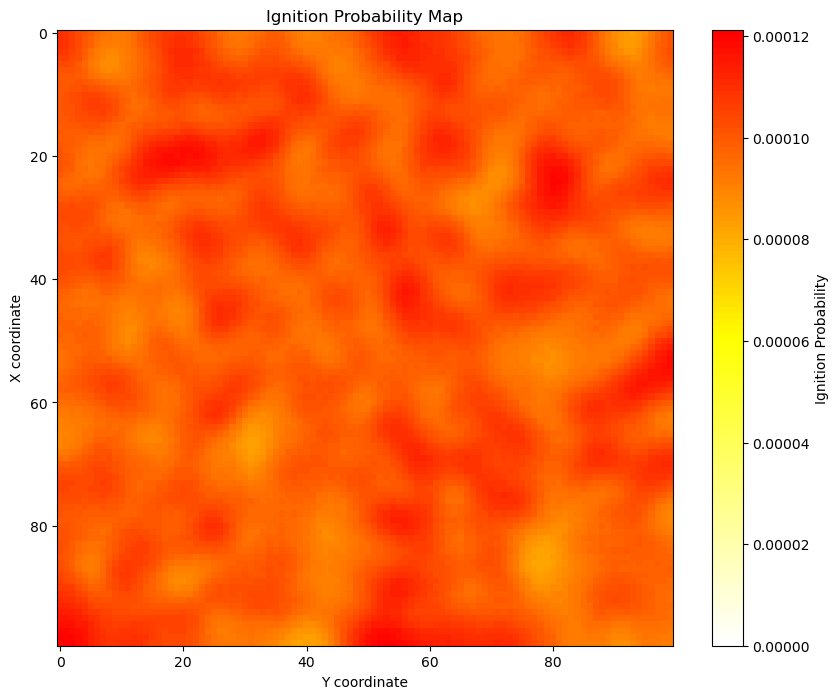

8 threads, tot time:  399.173476934433 tot time / n threads 3.9917347693443297


In [25]:
from concurrent.futures import ProcessPoolExecutor
from multiprocessing import shared_memory

for ignition_index in range(1,2):
    ignition_map = load_ignition_map(f"./ignition_maps/ignition_map{ignition_index}.txt")
    plot_ignition_map(ignition_map)

    shape = ignition_map.shape
    dtype = ignition_map.dtype
    shm = shared_memory.SharedMemory(create=True, size=ignition_map.nbytes)
    shared_ignition_map = np.ndarray(shape, dtype=dtype, buffer=shm.buf)
    np.copyto(shared_ignition_map, ignition_map)  # Copy data to shared memory

    start = time.time()
    with ProcessPoolExecutor(max_workers=8) as executor:
        futures = [executor.submit(generate_scenario, shm.name, shape, dtype, 100, f"ignition{ignition_index}/scenario{k}.txt") for k in range(0,15000)]
        results = [f.result() for f in futures]
    tot_time = time.time() - start
    print(8,"threads, tot time: ", tot_time, "tot time / n threads", tot_time/100)


In [26]:
import os
import tqdm
def generate_burn_map(folder_name):
    if not folder_name.endswith("/"):
        folder_name += "/"
    
    # Load first scenario to get dimensions
    first_scenario, _ = load_scenario(folder_name + os.listdir(folder_name)[0])
    T, N, M = first_scenario.shape
    
    # Initialize accumulator array
    burn_map = np.zeros((T, N, M))
    count = 0
    
    # Sum up all scenarios
    for filename in tqdm.tqdm(os.listdir(folder_name)):
        if filename.endswith('.txt'):
            scenario, _ = load_scenario(folder_name + filename)
            burn_map += scenario
            count += 1
    
    # Calculate mean
    burn_map = burn_map / count
    return burn_map

for ignition_index in range(1,2):
    burn_maps = generate_burn_map(f"ignition{ignition_index}")
    for timestep in range(0,100):
        save_scenario(burn_maps,0,f'burn_map_{ignition_index}_{timestep}')


100%|██████████| 15001/15001 [16:16:50<00:00,  3.91s/it]     


(100, 100, 100)

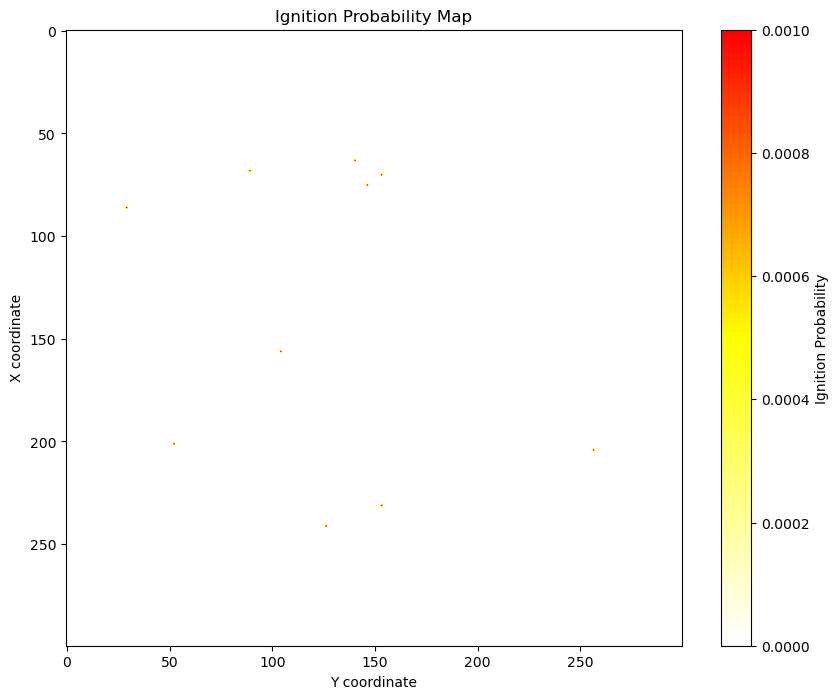

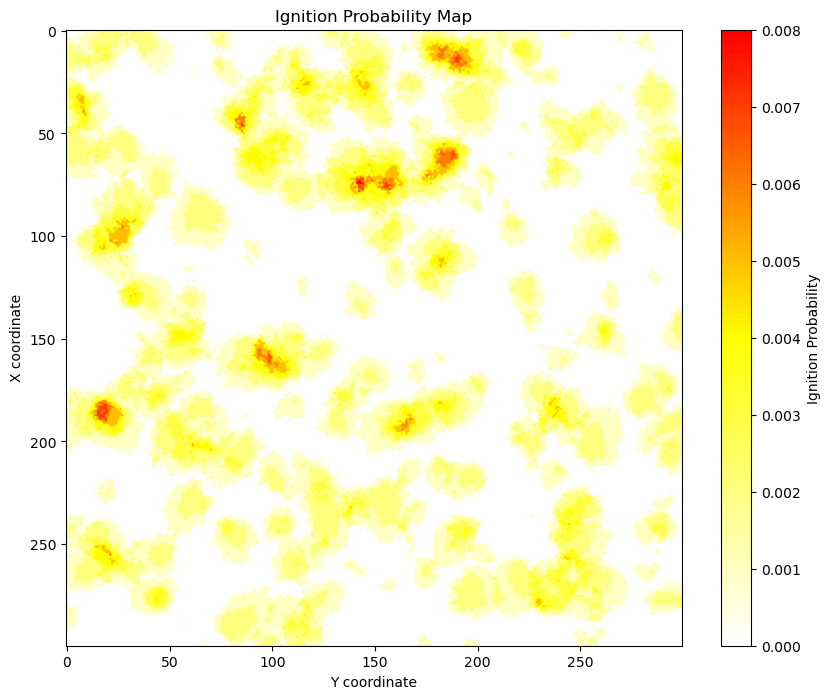

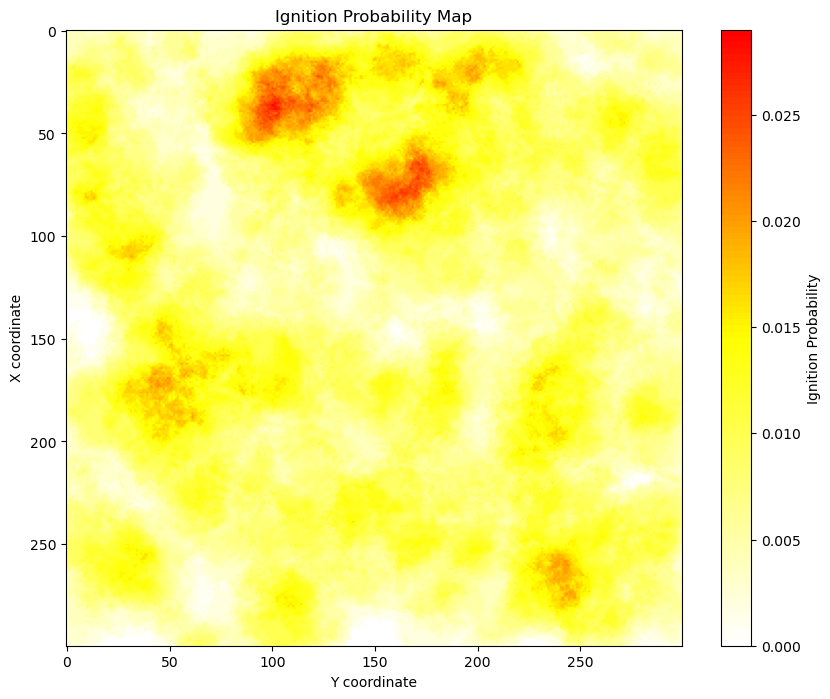

In [3]:
plot_ignition_map(bms[3][0])
plot_ignition_map(bms[3][30])
plot_ignition_map(bms[3][60])

In [2]:
bdir = 'burn_maps'
bms = []
for i in range(1,6):
    bm, _ = load_scenario(f"{bdir}/burn_map_{i}")
    print(i, "loaded")
    bms.append(bm)


1 loaded
2 loaded
3 loaded
4 loaded
5 loaded


cd burn_maps

In [2]:
cd burn_maps

/Users/puech/Desktop/MIT/Research/Climate/Wildfire/wildfire_drone_routing/burn_maps


In [7]:

create_scenario_video("burn_map_5.txt", burn_map=True)

100 to play with
display_burn_map_5/grid_timestep_000.png
display_burn_map_5/grid_timestep_001.png
display_burn_map_5/grid_timestep_002.png
display_burn_map_5/grid_timestep_003.png
display_burn_map_5/grid_timestep_004.png
display_burn_map_5/grid_timestep_005.png
display_burn_map_5/grid_timestep_006.png
display_burn_map_5/grid_timestep_007.png
display_burn_map_5/grid_timestep_008.png
display_burn_map_5/grid_timestep_009.png
display_burn_map_5/grid_timestep_010.png
display_burn_map_5/grid_timestep_011.png
display_burn_map_5/grid_timestep_012.png
display_burn_map_5/grid_timestep_013.png
display_burn_map_5/grid_timestep_014.png
display_burn_map_5/grid_timestep_015.png
display_burn_map_5/grid_timestep_016.png
display_burn_map_5/grid_timestep_017.png
display_burn_map_5/grid_timestep_018.png
display_burn_map_5/grid_timestep_019.png
display_burn_map_5/grid_timestep_020.png
display_burn_map_5/grid_timestep_021.png
display_burn_map_5/grid_timestep_022.png
display_burn_map_5/grid_timestep_023.png

In [2]:
import numpy as np
import time
from displays import display_grid, save_grid_image, create_video_from_images, create_scenario_video
from simulations import propagate_wildfire, propagate_smoke, propagate_smoke_parallel, propagate_smoke_parallel2, run_simulation, generate_scenario, load_ignition_map, plot_ignition_map,generate_ignition_map, save_ignition_map, load_scenario,save_scenario
from Drone import Drone


from concurrent.futures import ThreadPoolExecutor
from matplotlib import pyplot as plt
from benchmark import run_benchmark_scenario, run_benchmark_scenarii
from RoutingStrategy import RoutingStrategy, GroundPlacementStrategy
scenario, starting_time = load_scenario('./ignition1/scenario78.txt')
start = time.time()
delta , device , (position_history, ground, charging) = run_benchmark_scenario(scenario,starting_time,GroundPlacementStrategy,RoutingStrategy,(50,50,100), (100,), return_history=True)
print(time.time() - start)

0.005430936813354492


In [2]:
delta, device, starting_time, len(position_history)

(10, 'drone', 59, 70)

In [3]:
create_scenario_video(scenario[:len(position_history)],drone_locations_history=position_history,starting_time=starting_time,out_filename='test_simulation', ground_sensor_locations = ground, charging_stations_locations = charging)

Video saved at: display_test_simulation/test_simulation.mp4
Video saved as test_simulation.mp4


In [3]:
start = time.time()
run_benchmark_scenarii('ignition5/',GroundPlacementStrategy,RoutingStrategy,(50,50,100), (100,))
print(time.time() - start)

  1%|          | 10/1000 [00:26<43:05,  2.61s/it] 


In [ ]:
# TODO do it only for ground

In [3]:
from RoutingStrategy import GroundPlacementOptimization, RoutingStrategy

# start = GroundPlacementOptimization(10,10,100,"burn_maps/burn_map_1")
# print(start.get_locations())

In [2]:
from RoutingStrategy import GroundPlacementOptimization
from benchmark import run_benchmark_scenario

start = GroundPlacementOptimization(10,10,100,"burn_maps/burn_map_1")
print(start.get_locations())

# start = GroundPlacementOptimization(10,10,100,"burn_maps/burn_map_1")
# print(start.get_locations())

# start = GroundPlacementOptimization(10,10,100,"burn_maps/burn_map_1")
# print(start.get_locations())

# start = GroundPlacementOptimization(10,10,100,"burn_maps/burn_map_1")
# print(start.get_locations())

# scenario, starting_time = load_scenario('./ignition1/scenario78.txt')
# delta , device , (position_history, ground, charging) = run_benchmark_scenario(scenario,starting_time,GroundPlacementOptimization,RoutingStrategy,(10,10,100,"burn_maps/burn_map_1"), (0,100,100), return_history=True)

# print(f"{delta=}, {device=}, {starting_time=}, {len(position_history)=}")

# create_scenario_video(scenario[:len(position_history)],drone_locations_history=position_history,starting_time=starting_time,out_filename='test_simulation', ground_sensor_locations = ground, charging_stations_locations = charging)

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 16.49420674983412 seconds
[(18, 24), (19, 38), (40, 8), (43, 49), (43, 98), (54, 22), (58, 78), (59, 71), (67, 44), (94, 6)]
([(18, 24), (19, 38), (40, 8), (43, 49), (43, 98), (54, 22), (58, 78), (59, 71), (67, 44), (94, 6)], [(28, 69), (31, 78), (36, 84), (76, 81), (89, 20), (91, 1), (98, 18), (99, 15), (99, 65), (99, 87)])


In [2]:
# Full benchmark (about 1 minute to run)
from benchmark import run_benchmark_scenarii_scequential
from RoutingStrategy import GroundPlacementOptimization, RoutingStrategy
import time
start = time.time()
run_benchmark_scenarii_scequential('ignition1/',GroundPlacementOptimization,RoutingStrategy,(10,10,100,"burn_maps/burn_map_1"), (0,100,100), max_n_scenarii=100)
print(time.time() - start)

  1%|          | 1/100 [00:16<27:59, 16.96s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 16.025822541909292 seconds


  2%|▏         | 2/100 [00:32<26:16, 16.08s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 15.361141958041117 seconds


  3%|▎         | 3/100 [00:49<26:59, 16.70s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 17.35461449995637 seconds


  4%|▍         | 4/100 [01:08<28:11, 17.62s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 18.96990383299999 seconds


  5%|▌         | 5/100 [01:25<27:26, 17.33s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 16.748327624984086 seconds


  6%|▌         | 6/100 [01:45<28:18, 18.07s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 19.430135458009318 seconds


  7%|▋         | 7/100 [02:08<30:28, 19.66s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 22.87989474995993 seconds


  8%|▊         | 8/100 [02:29<30:49, 20.10s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 20.968897624872625 seconds


  9%|▉         | 9/100 [02:48<30:18, 19.98s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 19.633352915989235 seconds


 10%|█         | 10/100 [03:12<31:42, 21.14s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 23.664327875012532 seconds


 11%|█         | 11/100 [03:30<30:02, 20.25s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 18.128382374998182 seconds


 12%|█▏        | 12/100 [03:52<30:11, 20.59s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 21.277909707976505 seconds


 13%|█▎        | 13/100 [04:25<35:25, 24.43s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 33.173370624892414 seconds


 14%|█▍        | 14/100 [04:44<32:41, 22.80s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 18.95748700015247 seconds


 15%|█▌        | 15/100 [05:01<29:57, 21.15s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 17.21551079209894 seconds


 16%|█▌        | 16/100 [05:17<27:27, 19.61s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 15.878160000080243 seconds


 17%|█▋        | 17/100 [05:39<27:56, 20.20s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 21.492885916959494 seconds


 18%|█▊        | 18/100 [06:13<33:25, 24.46s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 34.305006250040606 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 21.622420457890257 seconds


 20%|██        | 20/100 [06:53<29:09, 21.87s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 17.68049916718155 seconds


 21%|██        | 21/100 [07:12<27:33, 20.93s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 18.562241917010397 seconds


 22%|██▏       | 22/100 [07:30<26:20, 20.26s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 18.603454458061606 seconds


 23%|██▎       | 23/100 [07:50<25:54, 20.19s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 19.9632067498751 seconds


 24%|██▍       | 24/100 [08:10<25:17, 19.96s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 19.32155750016682 seconds


 25%|██▌       | 25/100 [08:28<24:22, 19.50s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 18.336118792183697 seconds


 26%|██▌       | 26/100 [08:46<23:20, 18.93s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 17.521796209039167 seconds


 27%|██▋       | 27/100 [09:06<23:33, 19.36s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 20.27077916683629 seconds


 28%|██▊       | 28/100 [09:24<22:42, 18.92s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 17.829099166905507 seconds


 29%|██▉       | 29/100 [09:43<22:21, 18.89s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 18.71640787506476 seconds


 30%|███       | 30/100 [10:02<21:58, 18.83s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 18.555772040970623 seconds


 31%|███       | 31/100 [10:21<21:53, 19.04s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 19.435569958062842 seconds


 32%|███▏      | 32/100 [11:07<30:36, 27.00s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 45.494265584042296 seconds


 33%|███▎      | 33/100 [11:46<34:22, 30.78s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 39.51060599996708 seconds


 34%|███▍      | 34/100 [12:05<30:00, 27.28s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 19.039928749902174 seconds


 35%|███▌      | 35/100 [12:21<25:38, 23.67s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 15.166028040926903 seconds


 36%|███▌      | 36/100 [12:36<22:32, 21.14s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 15.081668250029907 seconds


 37%|███▋      | 37/100 [12:52<20:32, 19.57s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 15.8255967090372 seconds


 38%|███▊      | 38/100 [13:07<18:50, 18.24s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 15.047617290867493 seconds


 39%|███▉      | 39/100 [13:21<17:21, 17.07s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 14.26583645818755 seconds


 40%|████      | 40/100 [13:36<16:21, 16.36s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 14.59768291702494 seconds


 41%|████      | 41/100 [13:59<18:09, 18.47s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 23.315598624991253 seconds


 42%|████▏     | 42/100 [14:21<18:46, 19.42s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 21.53000899986364 seconds


 43%|████▎     | 43/100 [15:22<30:25, 32.03s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 61.36590874986723 seconds


 44%|████▍     | 44/100 [16:03<32:19, 34.64s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 40.6282022499945 seconds


 45%|████▌     | 45/100 [16:26<28:31, 31.12s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 22.82520120893605 seconds


 46%|████▌     | 46/100 [16:51<26:23, 29.32s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 24.968270041048527 seconds


 47%|████▋     | 47/100 [17:15<24:31, 27.76s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 24.043053625151515 seconds


 48%|████▊     | 48/100 [17:36<22:18, 25.74s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 20.93201662483625 seconds


 49%|████▉     | 49/100 [18:24<27:30, 32.36s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 47.71102883294225 seconds


 50%|█████     | 50/100 [18:45<24:04, 28.88s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 20.678749582963064 seconds


 51%|█████     | 51/100 [19:18<24:31, 30.04s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 32.64515291689895 seconds


 52%|█████▏    | 52/100 [19:34<20:47, 25.98s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 16.4258025418967 seconds


 53%|█████▎    | 53/100 [19:52<18:29, 23.61s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 17.98322358378209 seconds


 54%|█████▍    | 54/100 [20:10<16:40, 21.74s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 17.289610209176317 seconds


 55%|█████▌    | 55/100 [20:26<15:01, 20.04s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 15.983490249840543 seconds


 56%|█████▌    | 56/100 [20:44<14:13, 19.39s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 17.78076645801775 seconds


 57%|█████▋    | 57/100 [21:01<13:34, 18.94s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 17.801012666895986 seconds


 58%|█████▊    | 58/100 [21:18<12:45, 18.23s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 16.48709087516181 seconds


 59%|█████▉    | 59/100 [21:52<15:40, 22.94s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 33.838246249826625 seconds


 60%|██████    | 60/100 [22:20<16:14, 24.36s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 27.58569333399646 seconds


 61%|██████    | 61/100 [22:43<15:37, 24.04s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 23.220524583943188 seconds


 62%|██████▏   | 62/100 [24:23<29:46, 47.01s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 100.52265829197131 seconds


 63%|██████▎   | 63/100 [26:23<42:28, 68.87s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 119.7759282910265 seconds


 64%|██████▍   | 64/100 [28:24<50:37, 84.37s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 120.4614666251 seconds


 65%|██████▌   | 65/100 [30:37<57:40, 98.86s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 132.58247587503865 seconds


 66%|██████▌   | 66/100 [32:40<1:00:16, 106.36s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 123.78018441679887 seconds


 67%|██████▋   | 67/100 [34:52<1:02:34, 113.78s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 130.97832329105586 seconds


 68%|██████▊   | 68/100 [37:14<1:05:18, 122.45s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 142.60102279204875 seconds


 69%|██████▉   | 69/100 [39:17<1:03:21, 122.64s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 122.98468520794995 seconds


 70%|███████   | 70/100 [41:02<58:34, 117.14s/it]  

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 104.16699741687626 seconds


 71%|███████   | 71/100 [42:54<55:57, 115.78s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 112.51230387506075 seconds


 72%|███████▏  | 72/100 [44:38<52:22, 112.23s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 103.86572112492286 seconds


 73%|███████▎  | 73/100 [46:42<52:06, 115.79s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 124.02149504190311 seconds


 74%|███████▍  | 74/100 [48:20<47:52, 110.46s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 97.93634158279747 seconds


 75%|███████▌  | 75/100 [50:02<44:58, 107.93s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 101.93278262484819 seconds


 76%|███████▌  | 76/100 [50:26<33:00, 82.51s/it] 

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 23.112902957946062 seconds


 77%|███████▋  | 77/100 [51:35<30:08, 78.62s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 69.43082229187712 seconds


 78%|███████▊  | 78/100 [52:02<23:11, 63.25s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 27.30534891691059 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 25.15318770916201 seconds


 80%|████████  | 80/100 [52:43<13:37, 40.87s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 15.166944249998778 seconds


 81%|████████  | 81/100 [52:58<10:31, 33.22s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 15.277139916783199 seconds


 82%|████████▏ | 82/100 [53:13<08:19, 27.73s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 14.846861124970019 seconds


 83%|████████▎ | 83/100 [53:28<06:46, 23.90s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 14.852961624972522 seconds


 84%|████████▍ | 84/100 [53:44<05:41, 21.36s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 15.336904207943007 seconds


 85%|████████▌ | 85/100 [54:01<05:00, 20.06s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 16.95317312516272 seconds


 86%|████████▌ | 86/100 [54:20<04:38, 19.86s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 19.305600084131584 seconds


 87%|████████▋ | 87/100 [54:55<05:17, 24.41s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 34.944830334046856 seconds


 88%|████████▊ | 88/100 [57:16<11:50, 59.23s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 140.3823672090657 seconds


 89%|████████▉ | 89/100 [57:47<09:21, 51.03s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 31.793224958935753 seconds


 90%|█████████ | 90/100 [58:19<07:30, 45.08s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 31.126185750123113 seconds


 91%|█████████ | 91/100 [59:20<07:29, 49.93s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 61.16109316702932 seconds


 92%|█████████▏| 92/100 [59:40<05:28, 41.09s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 20.352977582952008 seconds


 93%|█████████▎| 93/100 [59:55<03:52, 33.14s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 14.527617791900411 seconds


 94%|█████████▍| 94/100 [1:00:09<02:44, 27.48s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 14.16947270790115 seconds


 95%|█████████▌| 95/100 [1:00:24<01:57, 23.57s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 14.364652666961774 seconds


 96%|█████████▌| 96/100 [1:00:38<01:23, 20.89s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 14.531896790955216 seconds


 97%|█████████▋| 97/100 [1:05:35<05:10, 103.60s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 296.50513883307576 seconds


 98%|█████████▊| 98/100 [1:06:37<03:02, 91.16s/it] 

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 62.05171495792456 seconds


 99%|█████████▉| 99/100 [1:06:55<01:09, 69.33s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 18.310736916959286 seconds


100%|██████████| 100/100 [1:07:11<00:00, 40.31s/it]


Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 15.061987665947527 seconds
This strategy took on average 24.458333333333332 time steps to find the fire.
Fire found 36.0% of the time by ground sensor
Fire found 36.0% of the time by charging station
Fire found 0.0% of the time by drone
Fire found 28.0% of the time by undetected
4031.113044023514


In [2]:
from benchmark import run_benchmark_scenarii_sequential,run_ground_log
from RoutingStrategy import GroundPlacementOptimization, RoutingStrategy, GroundPlacementStrategy
import time
start = time.time()
run_ground_log('ignition1/','optimized_locations_1',GroundPlacementOptimization,(10,10,100,"burn_maps/burn_map_1"), max_n_scenarii=50)
print(time.time() - start)


start = time.time()
run_ground_log('ignition2/','optimized_locations_2',GroundPlacementOptimization,(10,10,100,"burn_maps/burn_map_1"), max_n_scenarii=50)
print(time.time() - start)



start = time.time()
run_ground_log('ignition3/','optimized_locations_3',GroundPlacementOptimization,(10,10,100,"burn_maps/burn_map_1"), max_n_scenarii=50)
print(time.time() - start)



# start = time.time()
# run_ground_log('ignition4/','optimized_locations_4',GroundPlacementOptimization,(10,10,100,"burn_maps/burn_map_1"), max_n_scenarii=2)
# print(time.time() - start)


# start = time.time()
# run_ground_log('ignition5/','optimized_locations_5',GroundPlacementOptimization,(10,10,100,"burn_maps/burn_map_1"), max_n_scenarii=2)
# print(time.time() - start)

  2%|▏         | 1/50 [01:04<52:57, 64.86s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 64.85417812503874 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 32.27403545891866 seconds


  6%|▌         | 3/50 [02:40<42:04, 53.72s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 63.2669043331407 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 61.612058999948204 seconds


 10%|█         | 5/50 [04:33<41:15, 55.00s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 51.706264707958326 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 23.252833208069205 seconds


 14%|█▍        | 7/50 [05:19<26:30, 36.99s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 22.112900000065565 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 18.65791720803827 seconds


 18%|█▊        | 9/50 [06:29<25:41, 37.61s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 51.793450583005324 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 63.96832066704519 seconds


 22%|██▏       | 11/50 [08:29<31:45, 48.85s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 55.902519500115886 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 35.24916112492792 seconds


 26%|██▌       | 13/50 [09:19<22:02, 35.73s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 15.061845041112974 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 18.71892266604118 seconds


 30%|███       | 15/50 [10:00<16:15, 27.88s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 21.588280583033338 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 16.377986416919157 seconds


 34%|███▍      | 17/50 [10:31<11:54, 21.66s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 15.226805167039856 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 15.167709416942671 seconds


 38%|███▊      | 19/50 [11:03<09:46, 18.93s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 17.112356417113915 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 14.210080832941458 seconds


 42%|████▏     | 21/50 [11:33<08:04, 16.70s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 14.807486624922603 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 17.96671991609037 seconds


 46%|████▌     | 23/50 [12:10<07:56, 17.67s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 19.026741499779746 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 14.532175416126847 seconds


 50%|█████     | 25/50 [12:39<06:45, 16.24s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 15.09736750018783 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 14.120322667062283 seconds


 54%|█████▍    | 27/50 [13:08<05:53, 15.35s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 14.751973333070055 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 22.160037624882534 seconds


 58%|█████▊    | 29/50 [13:45<05:49, 16.62s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 14.82908874982968 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 17.285067999968305 seconds


 62%|██████▏   | 31/50 [14:17<05:05, 16.06s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 14.265819207997993 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 15.31198325008154 seconds


 66%|██████▌   | 33/50 [14:46<04:21, 15.37s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 14.299381583929062 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 14.897530416026711 seconds


 70%|███████   | 35/50 [15:15<03:43, 14.89s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 14.088544582948089 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 16.14911412494257 seconds


 74%|███████▍  | 37/50 [15:46<03:16, 15.10s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 14.710059416014701 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 16.55039087496698 seconds


 78%|███████▊  | 39/50 [16:17<02:46, 15.16s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 14.262940292013809 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 13.999224749859422 seconds


 82%|████████▏ | 41/50 [16:45<02:11, 14.57s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 14.015464291907847 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 15.315696791978553 seconds


 86%|████████▌ | 43/50 [17:15<01:42, 14.66s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 14.34946783282794 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 14.194030083948746 seconds


 90%|█████████ | 45/50 [17:43<01:11, 14.36s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 13.978309208061546 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 16.697073749965057 seconds


 94%|█████████▍| 47/50 [18:14<00:44, 14.82s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 14.262324874987826 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 13.92452708305791 seconds


 98%|█████████▊| 49/50 [18:42<00:14, 14.55s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 14.54441091697663 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 21.46945674996823 seconds


100%|██████████| 50/50 [19:04<00:00, 22.88s/it]


1144.158210992813


  4%|▍         | 2/50 [01:06<25:35, 32.00s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 41.6790893340949 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 25.218137208139524 seconds


  6%|▌         | 3/50 [01:26<20:44, 26.48s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 19.920211958000436 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 67.00931437499821 seconds


 12%|█▏        | 6/50 [03:37<25:23, 34.63s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 47.21765320887789 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 16.05955420783721 seconds


 16%|█▌        | 8/50 [04:14<18:14, 26.06s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 17.714665916981176 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 19.540920333005488 seconds


 18%|█▊        | 9/50 [04:29<15:25, 22.57s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 14.888860207982361 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 16.151030665962026 seconds


 24%|██▍       | 12/50 [05:25<12:44, 20.11s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 23.21545641706325 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 17.160714166006073 seconds


 26%|██▌       | 13/50 [05:40<11:26, 18.56s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 14.996834042016417 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 18.763365208171308 seconds


 30%|███       | 15/50 [06:20<11:13, 19.25s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 20.688093125121668 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 20.956619374919683 seconds


 36%|███▌      | 18/50 [07:16<09:49, 18.41s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 19.63898791698739 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 15.360283375019208 seconds


 38%|███▊      | 19/50 [07:33<09:20, 18.10s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 17.35150504205376 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 20.131824957905337 seconds


 44%|████▍     | 22/50 [08:29<08:24, 18.01s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 19.78345754207112 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 15.640051791910082 seconds


 46%|████▌     | 23/50 [08:44<07:41, 17.10s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 14.966488833073527 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 59.71306841704063 seconds


 52%|█████▏    | 26/50 [10:25<10:02, 25.11s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 23.64970274991356 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 18.318005624925718 seconds


 54%|█████▍    | 27/50 [10:42<08:41, 22.67s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 16.977161624934524 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 28.892996167065576 seconds


 60%|██████    | 30/50 [14:12<18:32, 55.62s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 119.24805908300914 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 61.851420250022784 seconds


 62%|██████▏   | 31/50 [14:55<16:23, 51.76s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 42.752048583934084 seconds


 64%|██████▍   | 32/50 [15:57<16:25, 54.75s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 61.72621383308433 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 41.5929277499672 seconds


 68%|██████▊   | 34/50 [17:30<13:37, 51.08s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 51.72609437513165 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 38.283969999989495 seconds


 72%|███████▏  | 36/50 [18:57<11:07, 47.66s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 48.63773108297028 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 64.70990362507291 seconds


 76%|███████▌  | 38/50 [20:45<09:58, 49.90s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 43.20373191614635 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 78.31163899996318 seconds


 82%|████████▏ | 41/50 [24:44<10:32, 70.28s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 73.55780633306131 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 87.34145333408378 seconds


 84%|████████▍ | 42/50 [26:10<09:59, 74.93s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 85.78507725009695 seconds


 86%|████████▌ | 43/50 [26:33<06:54, 59.25s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 22.64619404100813 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 57.85503741702996 seconds


 90%|█████████ | 45/50 [29:13<06:00, 72.03s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 102.8422539588064 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 32.21913041709922 seconds


 96%|█████████▌| 48/50 [30:49<01:30, 45.35s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 33.254436457995325 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 29.723087291931733 seconds


 98%|█████████▊| 49/50 [31:20<00:41, 41.11s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 31.226132333045825 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 26.312057042028755 seconds


100%|██████████| 50/50 [31:46<00:00, 38.13s/it]


1906.5499548912048


  4%|▍         | 2/50 [00:40<15:43, 19.65s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 23.475442457944155 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 16.967400334076956 seconds


  6%|▌         | 3/50 [01:37<28:40, 36.60s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 56.76228495896794 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 26.186408958863467 seconds


 10%|█         | 5/50 [02:30<22:51, 30.47s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 26.885500333970413 seconds


 12%|█▏        | 6/50 [02:51<20:07, 27.45s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 21.590360042173415 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 54.28866429091431 seconds


 18%|█▊        | 9/50 [38:04<6:23:07, 560.68s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 1065.046162582934 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 993.6631464581005 seconds


 20%|██        | 10/50 [54:54<7:46:10, 699.26s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 1009.5756204170175 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 31.352847958914936 seconds


 24%|██▍       | 12/50 [1:11:34<6:44:36, 638.85s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 968.2140985000879 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 953.4005260840058 seconds


 28%|██▊       | 14/50 [2:01:18<11:15:34, 1125.96s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 2031.370912999846 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 279.87083754106425 seconds


 34%|███▍      | 17/50 [2:40:29<7:59:40, 872.13s/it]  

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 1952.9414559579454 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 117.5173696661368 seconds


 38%|███▊      | 19/50 [3:33:18<9:33:44, 1110.46s/it] 

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 2976.5084162089042 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 192.60021333303303 seconds


 42%|████▏     | 21/50 [3:38:18<4:58:37, 617.84s/it] 

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 179.46399720804766 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 121.01516779093072 seconds


 46%|████▌     | 23/50 [3:39:14<2:22:11, 315.99s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 37.21481729182415 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 18.37069237488322 seconds


 48%|████▊     | 24/50 [3:39:32<1:38:14, 226.70s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 18.419785041129217 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 17.005892917048186 seconds


 52%|█████▏    | 26/50 [3:40:08<48:06, 120.29s/it]  

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 18.815508249914274 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 28.19424895895645 seconds


 58%|█████▊    | 29/50 [3:41:14<19:12, 54.88s/it] 

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 19.002891917014495 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 18.27701162500307 seconds


 62%|██████▏   | 31/50 [3:41:52<11:34, 36.58s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 20.90915391710587 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 17.645122457994148 seconds


 64%|██████▍   | 32/50 [3:42:10<09:19, 31.07s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 18.213460374856368 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 28.41561691602692 seconds


 70%|███████   | 35/50 [3:43:15<05:58, 23.93s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 18.574245791183785 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 17.316547290887684 seconds


 72%|███████▏  | 36/50 [3:43:34<05:14, 22.43s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 18.939499167026952 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 16.87264558300376 seconds


 78%|███████▊  | 39/50 [3:44:35<04:02, 22.00s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 17.187302083941177 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 27.391566667007282 seconds


 80%|████████  | 40/50 [3:44:55<03:34, 21.46s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 20.180765542201698 seconds


 84%|████████▍ | 42/50 [3:45:43<03:05, 23.23s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 19.4778735418804 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 28.757002166006714 seconds


 88%|████████▊ | 44/50 [3:46:45<02:43, 27.27s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 27.649322874844074 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 33.59194808313623 seconds


 90%|█████████ | 45/50 [3:47:12<02:16, 27.32s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 27.432824709219858 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 25.667229499900714 seconds


 96%|█████████▌| 48/50 [3:48:26<00:50, 25.10s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 28.146635458804667 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 20.155806458787993 seconds


 98%|█████████▊| 49/50 [3:49:08<00:30, 30.23s/it]

Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 42.19218487502076 seconds
Set parameter Username
Set parameter LicenseID to value 2612529
Academic license - for non-commercial use only - expires 2026-01-21
Took 24.436746083199978 seconds


100%|██████████| 50/50 [3:49:33<00:00, 275.46s/it]


13773.240441083908


In [11]:
reset_count()
start = time.time()
run_benchmark_scenarii_sequential('ignition1/',LoggedGroundPlacementStrategy,RoutingStrategy,("optimized_locations_1.json",), (0,), max_n_scenarii=50)
print(time.time() - start)

reset_count()
start = time.time()
run_benchmark_scenarii_sequential('ignition1/',GroundPlacementStrategy,RoutingStrategy,(10,10,100), (0,), max_n_scenarii=200)
print(time.time() - start)

100%|██████████| 50/50 [00:02<00:00, 16.85it/s]


This strategy took on average 24.205128205128204 time steps to find the fire.
Fire found 46.0% of the time by ground sensor
Fire found 32.0% of the time by charging station
Fire found 0.0% of the time by drone
Fire found 22.0% of the time by undetected
2.9681379795074463


100%|██████████| 200/200 [00:11<00:00, 16.81it/s]


This strategy took on average 24.805755395683452 time steps to find the fire.
Fire found 35.0% of the time by ground sensor
Fire found 34.5% of the time by charging station
Fire found 0.0% of the time by drone
Fire found 30.5% of the time by undetected
11.898954153060913


In [12]:
reset_count()
start = time.time()
run_benchmark_scenarii_sequential('ignition2/',LoggedGroundPlacementStrategy,RoutingStrategy,("optimized_locations_2.json",), (0,), max_n_scenarii=50)
print(time.time() - start)

reset_count()
start = time.time()
run_benchmark_scenarii_sequential('ignition2/',GroundPlacementStrategy,RoutingStrategy,(10,10,100), (0,), max_n_scenarii=200)
print(time.time() - start)

100%|██████████| 50/50 [00:03<00:00, 16.57it/s]


This strategy took on average 21.61904761904762 time steps to find the fire.
Fire found 56.0% of the time by ground sensor
Fire found 28.0% of the time by charging station
Fire found 0.0% of the time by drone
Fire found 16.0% of the time by undetected
3.0191421508789062


100%|██████████| 200/200 [00:12<00:00, 16.45it/s]


This strategy took on average 23.711267605633804 time steps to find the fire.
Fire found 34.0% of the time by ground sensor
Fire found 37.0% of the time by charging station
Fire found 0.0% of the time by drone
Fire found 29.0% of the time by undetected
12.160014867782593


In [13]:
reset_count()
start = time.time()
run_benchmark_scenarii_sequential('ignition3/',LoggedGroundPlacementStrategy,RoutingStrategy,("optimized_locations_3.json",), (0,), max_n_scenarii=50)
print(time.time() - start)

reset_count()
start = time.time()
run_benchmark_scenarii_sequential('ignition3/',GroundPlacementStrategy,RoutingStrategy,(10,10,100), (0,), max_n_scenarii=200)
print(time.time() - start)

100%|██████████| 50/50 [00:03<00:00, 15.90it/s]


This strategy took on average 24.4 time steps to find the fire.
Fire found 46.0% of the time by ground sensor
Fire found 24.0% of the time by charging station
Fire found 0.0% of the time by drone
Fire found 30.0% of the time by undetected
3.145530939102173


100%|██████████| 200/200 [00:12<00:00, 16.27it/s]


This strategy took on average 23.235714285714284 time steps to find the fire.
Fire found 32.5% of the time by ground sensor
Fire found 37.5% of the time by charging station
Fire found 0.0% of the time by drone
Fire found 30.0% of the time by undetected
12.297138929367065
